Nama: Fernandi Widardo
NIM: 2301864000
Jawaban No. 4 UAS Machine Learning

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
#Read and Print Head Train Dataset

df = pd.read_csv('trainDataset.csv')
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
#Print Train Dataset

df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [5]:
#Checking Train Dataset untuk Null atau Missing Value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [6]:
#Data Splitting

y = df["admitted"]
X = df.drop(["admitted"], axis=1)

In [7]:
#Saya membagi dataset menjadi Train Set sebesar 70% dan Validation Set sebesar 30%

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,gmat,gpa,work_experience
13,680,3.3,4
31,620,2.7,2
34,680,3.3,5
8,740,3.3,5
17,650,3.7,6
24,570,3.0,2
0,780,4.0,3
33,660,3.3,6
5,730,3.7,6
11,690,3.7,5


In [9]:
y_train

13    0
31    0
34    1
8     1
17    1
24    0
0     1
33    1
5     1
11    1
1     1
29    1
21    0
2     0
30    0
36    0
3     1
35    0
23    0
32    1
10    0
22    0
18    0
20    1
7     1
14    1
28    1
38    0
Name: admitted, dtype: int64

In [10]:
X_val

,gmat,gpa,work_experience
19,590,2.3,3
16,580,2.7,4
15,610,3.0,1
26,660,3.7,4
4,680,3.9,4
12,710,3.7,6
37,580,3.3,1
27,580,2.3,2
39,690,3.7,5
6,690,2.3,1


In [11]:
y_val

19    0
16    0
15    0
26    1
4     0
12    1
37    0
27    0
39    1
6     0
25    1
9     0
Name: admitted, dtype: int64

In [12]:
#Modelling Logistic Regression

logReg_model = linear_model.LogisticRegression()

In [13]:
#Train Fit Logistic Regression Model

logReg_model.fit(X_train, y_train)

LogisticRegression()

In [14]:
#Test Logistic Regression Model dengan Validation Dataset

lrPredict = logReg_model.predict(X_val)

In [15]:
#Evaluasi Confusion Matrix dan Accuracy Score

lrconfMatrix = confusion_matrix(y_val, lrPredict)
lrAccuracy = accuracy_score(y_val, lrPredict)

print("Confusion Matrix: ")
print(lrconfMatrix)
print("Logistic Regression Accuracy: ", lrAccuracy * 100)

Confusion Matrix: 
[[7 1]
 [0 4]]
Logistic Regression Accuracy:  91.66666666666666


Dari Confusion Matrix dan Accuracy Score yang didapat diatas, saya dapat menyimpulkan bahwa model logistic regression ini sudah lumayan baik dalam melakukan prediksi.

Model ini mendapatkan total 11 prediksi benar dan 1 prediksi yang salah. Berikut detailnya:
- True Positive = 7
- False Positive = 1
- True  Negative = 4
- False Negative = 0

Kemudian dibawah ini saya mencoba untuk melakukan evaluasi ROC-AUC untuk mendapatkan skor AUC.

In [16]:
#Hitung True Positive Rate dan False Positive Rate

fprLr, tprLr, thresholdLr = metrics.roc_curve(y_val, lrPredict)

#Hitung Area Under Curve Score

auc_scoreLr = metrics.roc_auc_score(y_val, lrPredict)

print(auc_scoreLr)

0.9375


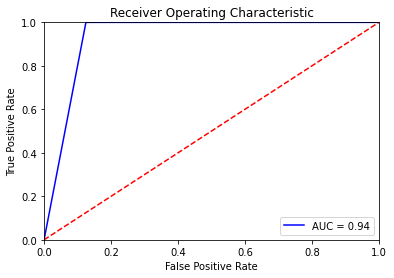

In [17]:
#Plot Grafik ROC-AUC

plt.title('Receiver Operating Characteristic')
plt.plot(fprLr, tprLr, 'b', label = 'AUC = %0.2f' % auc_scoreLr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Setelah mendapatkan hasil AUC score sebesar 0.9375, saya dapat menyimpulkan bahwa berdasarkan dataset ini, model logistic regression ini sudah dapat membedakan perbedaan antara orang yang 'admitted' dan tidak 'admitted'. Maka dari hasil Confusion Matrix, Accuracy Score, dan AUC Score saya akan menggunakan model ini untuk melakukan prediksi terhadap dataset table 2 pada soal.

In [18]:
#Read Test Dataset

testData = pd.read_csv('testDataset.csv')
testData

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


In [19]:
#Melakukan prediksi terhadap test data table 2 dengan model logistic regression

lrPredictTestData = logReg_model.predict(testData)

In [20]:
#Print hasil prediksi

lrPredictTestData

array([0, 1, 1, 0, 1], dtype=int64)